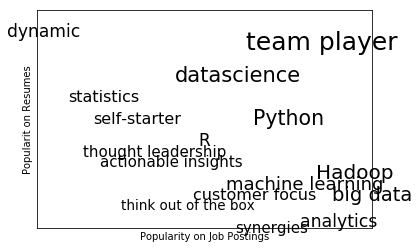

In [0]:
import matplotlib.pyplot as plt
def text_size(total):
    return 8+total / 200 *20
for word, job_popularity, resume_popularity in  data:
    plt.text(job_popularity, resume_popularity,word,
             ha='center', va='center',size=text_size(job_popularity + resume_popularity)) 
    
plt.xlabel("Popularity on Job Postings") 
plt.ylabel("Popularit on Resumes") 
plt.axis([0,100, 0,100]) 
plt.xticks([]) 
plt.yticks([]) 
plt.show()


In [0]:
def fix_unicode(text):
    return text.replace(u"\u2019","'")


In [0]:
from bs4 import BeautifulSoup 
import requests 
url = "http://radar.oreilly.com/2010/06/what-is-data-science.html" 
html=requests.get(url).text 
soup = BeautifulSoup(html, 'html5lib')
content = soup.find("div")
regex = r"[\w']+|[\.]"
document = []

for para in content("p"):
    words = re.findall(regex,fix_unicode(para.text))
    document.extend(words)
    


In [0]:

bigrams=zip(document, document[1:]) 
transitions = defaultdict(list) 
for prev, current in bigrams:
    transitions[prev].append(current)


TypeError: 'list' object is not callable

In [0]:
trigrams = zip(document, document[1:], document[2:]) 
trigram_transitions=defaultdict(list) 
starts=[]
for prev, current,next in trigrams:
    if prev == ".":
        starts.append(current)
        trigram_transitions[(prev,	current)].append(next)


NameError: name 'defaultdict' is not defined

In [0]:
grammar={"_S":["_NP_VP"],
         "_NP":["_N","_A_NP_P_A_N"],
         "_VP":["_V","_V_NP"],
         "_N":["data	science","Python","regression"],
         "_A":["big","linear","logistic"],
         "_P":["about","near"],
         "_V":["learns","trains","tests","is"] }


In [0]:
def	is_terminal(token):
    return token[0]!= "_"


In [0]:
def expand(grammar,tokens):
    for i, token in enumerate(tokens):
        if is_terminal(token):continue
        replacement = random.choice(grammar[token])
        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens=tokens[:i]+replacement.split()+tokens[(i+1):]
        return expand(grammar,tokens)
    return tokens


In [0]:
def generate_sentence(grammar):
    return expand(grammar,	["_S"])



In [0]:
random.random()


NameError: name 'random' is not defined

In [0]:
inverse_normal_cdf(random.random())


NameError: name 'inverse_normal_cdf' is not defined

In [0]:
def roll_a_die():
    return random.choice([1,2,3,4,5,6])
def direct_sample():
    d1=roll_a_die()
    d2=roll_a_die()
    return d1,d1+d2


In [0]:
def random_y_given_x(x):
    return x + roll_a_die()


In [0]:
def random_x_given_y(y):
    if y<=7:
        return random.randrange(1,y)
    else:
        return random.randrange(y-6,7)
    


In [0]:
def gibbs_sample(num_iters=100):
    x,y=1,2
    for _ in range(num_iters):
        x=random_x_given_y(y)
        y=random_y_given_x(x)
        return x,y


In [0]:
def compare_distributions(num_samples=1000):
    counts=defaultdict(lambda:[0,0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0]+=1
        counts[direct_sample()][1]+=1
        return counts


In [0]:
def sample_from(weights):
    total=sum(weights)
    rnd=total
    random.random()
    for i,w in enumerate(weights):
        rnd-=w
        if rnd <=0: return i
            

In [0]:
documents=[["Hadoop","Big Data", "HBase", "Java", "Spark", "Storm","Cassandra"],
           ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
           ["Python", "scikit-learn",	"scipy","numpy","statsmodels","pandas"],
           ["R", "Python", "statistics", "regression", "probability"],
           ["machine learning", "regression", "decision trees", "libsvm"],
           ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
           ["statistics", "probability", "mathematics", "theory"],
           ["machine learning", "scikit-learn", "Mahout", "neural networks"],
           ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
           ["Hadoop", "Java", "MapReduce", "Big Data"],
           ["statistics", "R", "statsmodels"],
           ["C++", "deep learning", "artificial intelligence", "probability"],
           ["pandas", "R", "Python"],
           ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
           ["libsvm", "regression", "support vector machines"] ]


In [0]:
import collections
document_topic_counts = [collections.Counter() for _ in documents]


In [0]:
K= 4
topic_word_counts = [collections.Counter() for _ in range(K)]


In [0]:
topic_counts = [0 for _ in range(K)]


In [0]:
document_lengths = map(len, documents)


In [0]:
distinct_words = set(word for document in documents for word in document)
W=len(distinct_words)


In [0]:
D=len(documents)
document_topic_counts[3][1]


0

In [0]:
topic_word_counts[2]["nlp"]


0

In [0]:
def p_topic_given_document(topic, d, alpha=0.1):
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d]+ K*alpha))


In [0]:
def p_word_given_topic(word, topic, beta=0.1):
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))


In [0]:
def topic_weight(d,word,k):
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)


In [0]:
def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word,k)
                         for k in range(K)])


In [0]:
import random

random.seed(0) 
document_topics=[[random.randrange(K)for word in document]
                     for document in documents]


In [0]:
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] +=1


In [0]:
for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],document_topics[d])):
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            #document_lengths=map(int,document_lengths)
            #document_lengths[d] =document_lengths[d]- 1
            #new_topic=choose_new_topic(d,word)
            #document_topics[d][i]=new_topic

In [0]:
topic_names = ["Big Data and programming languages",
                 "Python and statistics",
                 "databases",
                 "machine learning"]


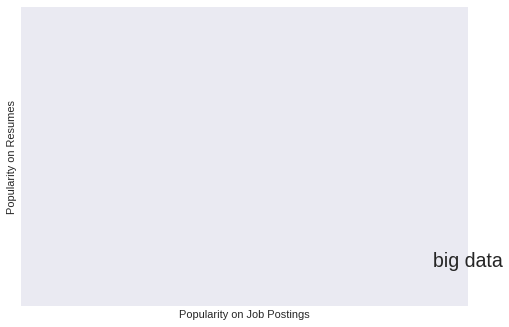

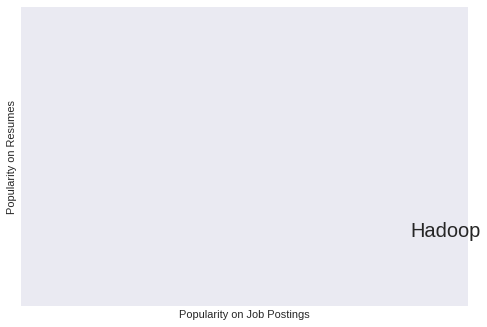

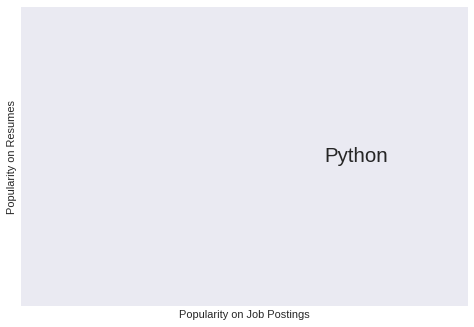

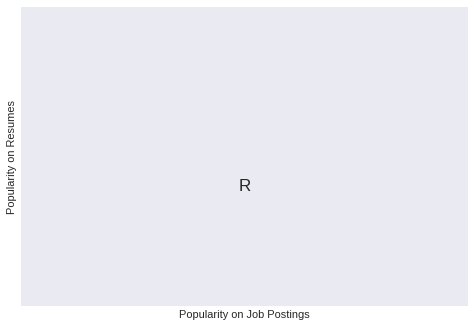

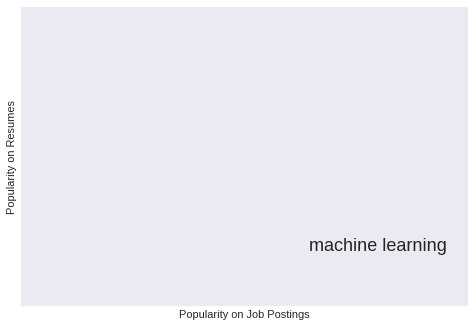

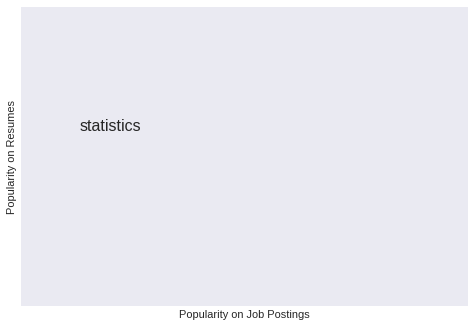

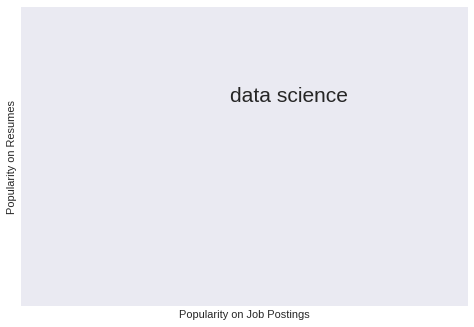

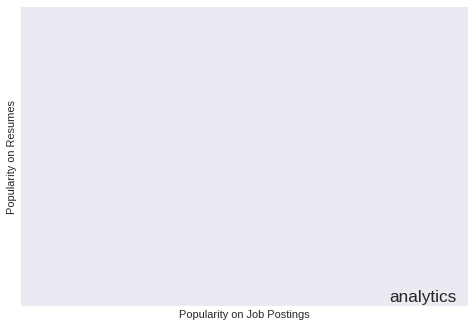

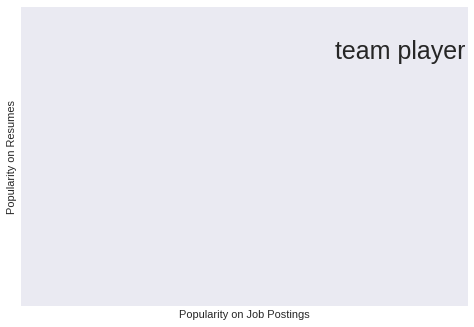

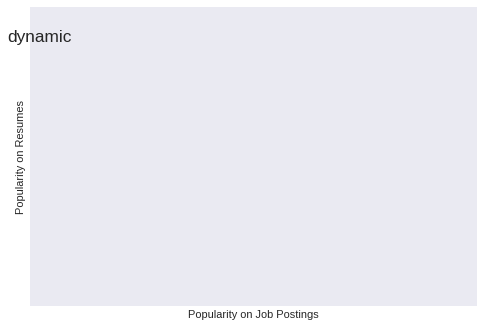

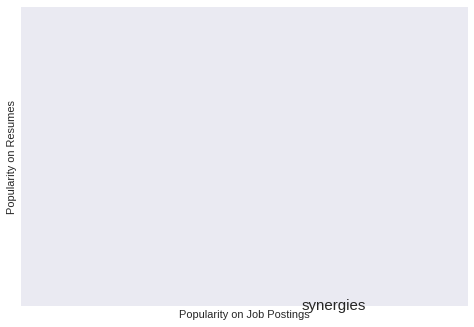

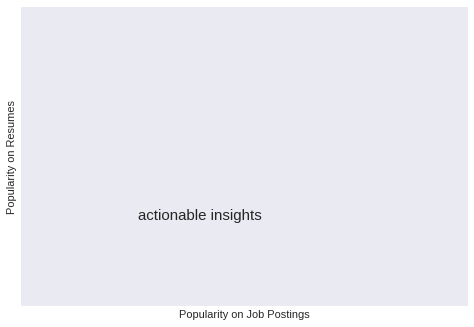

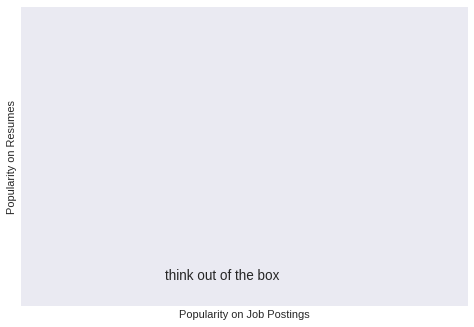

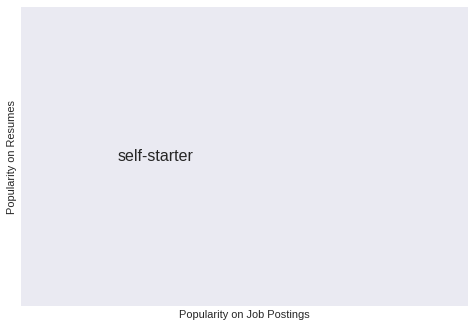

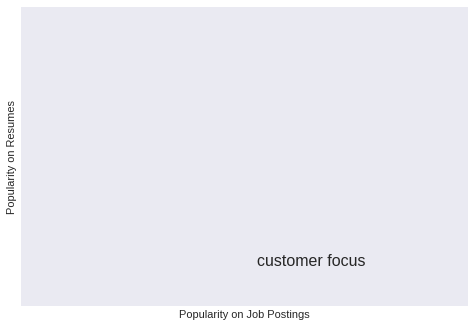

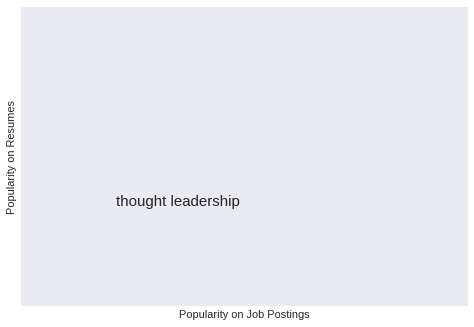

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50), 
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60), 
         ("data science", 60, 70), ("analytics", 90, 3), 
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0), 
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15), 
         ("thought leadership", 35, 35)]
def text_size(total): 
    """equals 8 if total is 0, 28 if total is 200""" 
    return 8 + total / 200 * 20
for word, job_popularity, resume_popularity in data: 
    plt.text(job_popularity, resume_popularity, word, 
             ha='center', va='center', 
             size=text_size(job_popularity + resume_popularity))
    plt.xlabel("Popularity on Job Postings") 
    plt.ylabel("Popularity on Resumes") 
    plt.axis([0, 100, 0, 100]) 
    plt.xticks([]) 
    plt.yticks([]) 
    plt.show()